# Modelo de aprendizaje supervisado "Regresión Lineal"

In [1]:
# Importar bibliotecas necesarias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.impute import SimpleImputer
!pip install scikit-learn
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [2]:
# Cargar datos desde el archivo CSV
df = pd.read_csv('/content/Titanic-Dataset.csv')

# Exploración de los registros del dataset
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# Exploración de la información del dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
# Observamos si hay datos nulos
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [5]:
# Eliminar columnas que no se necesitan para el analisis y tienen valores faltantes
df.drop(['Cabin', 'Embarked'], axis = 1, inplace = True)

# En la variable edad completare los valores faltantes con la media
df['Age'].fillna(df['Age'].mean(), inplace = True)

<ipython-input-5-cf4a4ed35d56>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(), inplace = True)


In [6]:
# Revisamos los datos nulos con los cambios realizados
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [7]:
# Reemplazar 'male' con 1 y 'female' con 2
df['Sex'] = df['Sex'].map({'male': 1, 'female': 2})

In [8]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",2,38.0,1,0,PC 17599,71.2833
2,3,1,3,"Heikkinen, Miss. Laina",2,26.0,0,0,STON/O2. 3101282,7.9250
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",2,35.0,1,0,113803,53.1000
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500


In [9]:
# Observamos las metricas
descri_num = df.describe()
descri_num

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,1.352413,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,0.477990,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,1.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,1.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,2.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,2.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
# Dividir el dataset en Train y Test
X = df[['Sex', 'Age', 'Pclass']]  # características relevantes seleccionadas
y = df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
# Imputar valores faltantes
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

In [12]:
# Entrenar el modelo de regresión lineal con los datos imputados
model = LinearRegression()
model.fit(X_train_imputed, y_train)

LinearRegression()

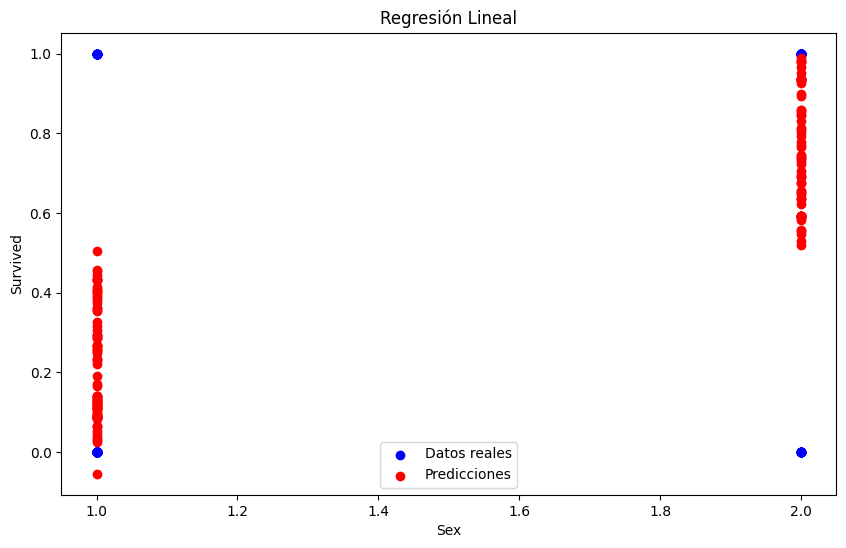

In [13]:
# Graficar diagrama de dispersión
plt.figure(figsize=(10, 6))
plt.scatter(X_test_imputed[:, 0], y_test, color='blue', label='Datos reales')
plt.scatter(X_test_imputed[:, 0], model.predict(X_test_imputed), color='red', label='Predicciones')
plt.xlabel('Sex')
plt.ylabel('Survived')
plt.title('Regresión Lineal')
plt.legend()
plt.show()

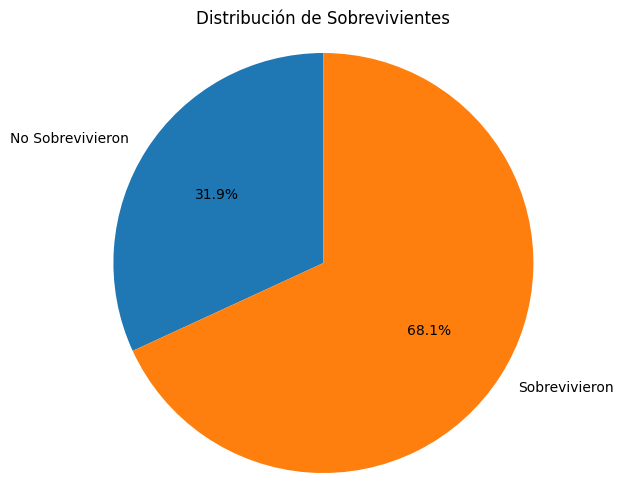

In [14]:
# Grafica diagrama circular 'pie' con porcentaje de sobrevivientes
plt.figure(figsize=(8, 6))
plt.pie(df.groupby('Sex')['Survived'].sum(), labels=['No Sobrevivieron', 'Sobrevivieron'], autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Distribución de Sobrevivientes')
plt.show()

In [15]:
# Imputar valores faltantes en el conjunto de prueba
X_test_imputed = imputer.transform(X_test)

# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test_imputed)

# Convertir las predicciones continuas a etiquetas binarias utilizando un umbral
# Se utiliza un umbral de 0.5: si la predicción es mayor que 0.5, se considera 1, de lo contrario 0
y_pred_binary = [1 if pred > 0.5 else 0 for pred in y_pred]

# Calcular precisión, recall, F1-score, y exactitud utilizando las predicciones binarias
accuracy = accuracy_score(y_test, y_pred_binary)
precision = precision_score(y_test, y_pred_binary)
recall = recall_score(y_test, y_pred_binary)
f1 = f1_score(y_test, y_pred_binary)

# Imprimir las métricas
print(f'Precisión: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1-score: {f1:.2f}')
print(f'Exactitud (Accuracy): {accuracy:.2f}')


Precisión: 0.76
Recall: 0.72
F1-score: 0.74
Exactitud (Accuracy): 0.79


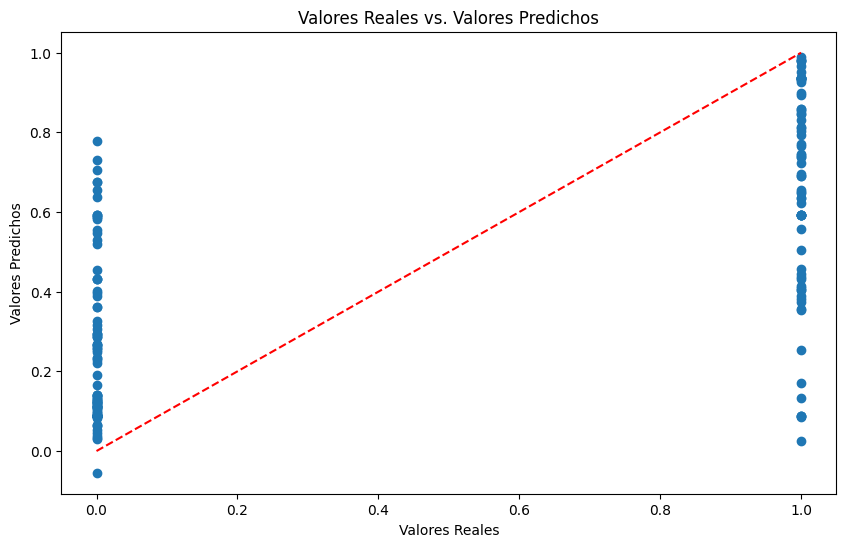

In [19]:
# Visualizar valores reales vs. valores predichos
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Valores Reales')
plt.ylabel('Valores Predichos')
plt.title('Valores Reales vs. Valores Predichos')
plt.show()